**Причины, по которым необходимо очищать данные**

**Очищение данных** (также известное как «data scrubbing» или «data cleaning») - это процесс выявления и исправления либо удаления неверных, неполных или нерелевантных данных из базы данных или набора данных. Очищение данных является важным этапом подготовки данных, поскольку оно помогает обеспечить точность, согласованность и полноту данных, что критически важно для принятия обоснованных решений и достижения желаемых результатов.

Существует несколько причин, по которым очищение данных необходимо:

1) **Проблемы качества данных**:
Со временем данные могут становиться некорректными или «грязными» по различным причинам, таким как ошибки ввода, устаревшая информация, ошибки форматирования и так далее. Очищение данных помогает выявлять и исправлять эти проблемы, чтобы данные были точными и надёжными.

2) **Согласованность данных**:
Несогласованные данные могут привести к путанице и неправильной интерпретации, что влияет на точность анализа и принимаемых на его основе решений. Очищение данных помогает обеспечить согласованность данных из разных источников и их соответствие стандартизированному формату.

3) **Полнота данных**:
Неполные данные могут привести к неточным выводам и ошибочным решениям. Очищение данных помогает выявлять и заполнять недостающие сведения, чтобы данные были полными и могли использоваться с уверенностью.

Техники, которые можно применять для очищения данных, включают:

1) **Валидация данных**: заключается в проверке данных на соответствие набору правил или стандартов, чтобы убедиться в их точности и полноте.

2) **Стандартизация данных**: предполагает преобразование данных в единый формат, например приведение всех дат к одному формату или перевод текста к нижнему регистру.

3) **Удаление дубликатов**: включает выявление и удаление повторяющихся записей.

4) **Обогащение данных**: предполагает добавление дополнительной информации к данным, например добавление географических координат к адресам.

In [1]:
# python -m venv myenv
# /venv/Scripts/activate
# pip install kagglehub pandas seaborn matplotlib kaggle 
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

c:\projc\teaching_activities\data_analysis_course\data_analysis_course\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Инструкция использования kaggle API:
1) pip install kaggle
1) https://www.kaggle.com/
2) Профиль -> Settings
3) Найти раздел API
4) Нажать "Create New API Token"
5) Поместить kaggle.json в папку
    - **Windows** C:\Users\<USERNAME>\.kaggle\kaggle.json
    - **macOS** ~/.kaggle/kaggle.json

In [2]:
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kalys\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


**Обработка пропусков**

In [3]:
df = pd.read_csv("datasets/Titanic_Dataset.csv")

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# 1 удалить строки (мало пропусков)
df["Age"] = df["Age"].dropna()
# 2 Заполнить медианой/средним/модой 
df2 = df["Age"].fillna(df["Age"].median())
# 3 Определенными значениями
df3 = df
df3["Age"] = df["Age"].fillna(0)

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

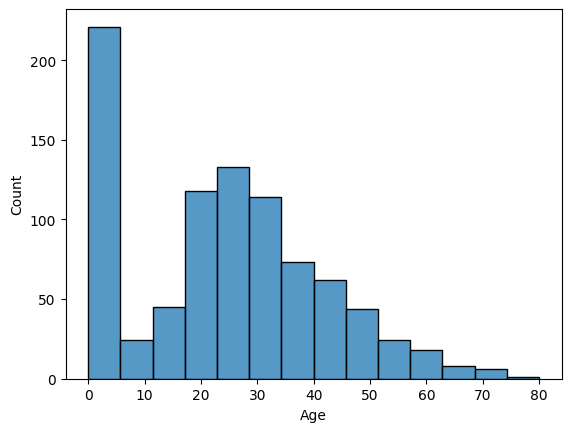

In [10]:
sns.histplot(df["Age"])

**Удаление дупликатов**

In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

np.int64(0)

**Перевод данных в другие типы, стандартизация строк**

In [13]:
df["Age"] = df["Age"].astype(int)

In [14]:
df["Name"] = df["Name"].str.lower().str.strip()

# Если нужно со всеми:
str_cols = df.select_dtypes(include=["object", "string"]).columns
print(str_cols)
df[str_cols] = df[str_cols].apply(lambda col: col.str.lower().str.strip())

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [15]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
df["Cabin"].head()

0     NaN
1     c85
2     NaN
3    c123
4     NaN
Name: Cabin, dtype: object

In [17]:
df.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             71
SibSp            7
Parch            7
Embarked         3
Pclass           3
Survived         2
Sex              2
dtype: int64

In [18]:
df = df.drop(columns = ["Cabin", "Name", "Ticket"])

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,s
1,2,1,1,female,38,1,0,71.2833,c
2,3,1,3,female,26,0,0,7.9250,s
3,4,1,1,female,35,1,0,53.1000,s
4,5,0,3,male,35,0,0,8.0500,s


In [20]:
# Разные написания одного значения
df["Sex"].value_counts()

# Исправление:
df["Sex"] = df["Sex"].str.lower().str.strip()

df["Embarked"] = df["Embarked"].fillna("unknown")

# Проверка
df["Embarked"].value_counts()

Embarked
s          644
c          168
q           77
unknown      2
Name: count, dtype: int64

In [ ]:
df["Ticket"].str.replace(r'\D+',"", regex = True)

In [ ]:
df = df[df["Embarked"] != 'unknown']

<Axes: xlabel='Age', ylabel='Count'>

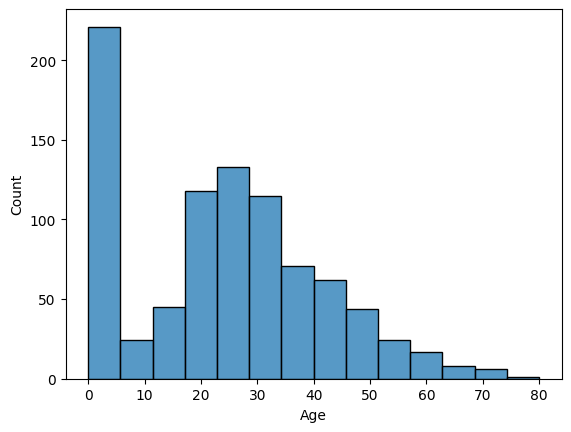

In [22]:
sns.histplot(df["Age"])

In [23]:
# df = df[df["Age"] >= 0]      # нельзя быть отрицательного возраста
# df = df[df["Age"] < 100]     # нереалистично >100 лет
# df = df[df["Fare"] >= 0]     # цена не бывает отрицательной
df = df[df["Pclass"].isin([1,2,3])]

df = df[(df["Age"] > 18) & (df["Age"] < 70)]

<Axes: xlabel='Age', ylabel='Count'>

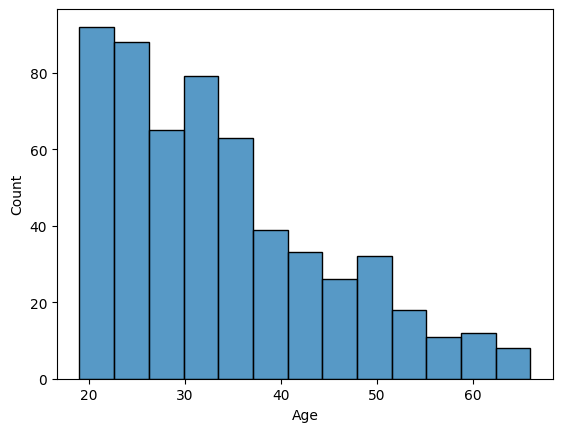

In [24]:
sns.histplot(df["Age"])

In [25]:
df["Pclass"].value_counts()

Pclass
3    259
1    164
2    143
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  566 non-null    int64  
 1   Survived     566 non-null    int64  
 2   Pclass       566 non-null    int64  
 3   Sex          566 non-null    object 
 4   Age          566 non-null    int64  
 5   SibSp        566 non-null    int64  
 6   Parch        566 non-null    int64  
 7   Fare         566 non-null    float64
 8   Embarked     566 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 44.2+ KB


<Axes: xlabel='Age', ylabel='Fare'>

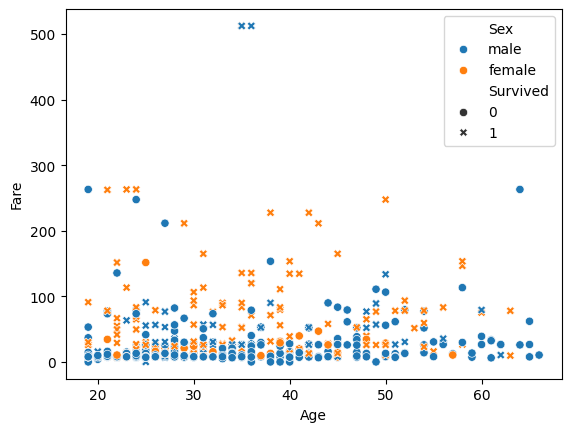

In [27]:
sns.scatterplot(data = df, x = "Age", y = "Fare", style = "Survived", hue = "Sex")

In [30]:
df["PassengerId"][(df["Sex"] == "female") & (df["Fare"] > 100) & (df["Survived"] == 1)].count()

np.int64(24)

In [31]:
df["Survived"].value_counts()

Survived
0    349
1    217
Name: count, dtype: int64

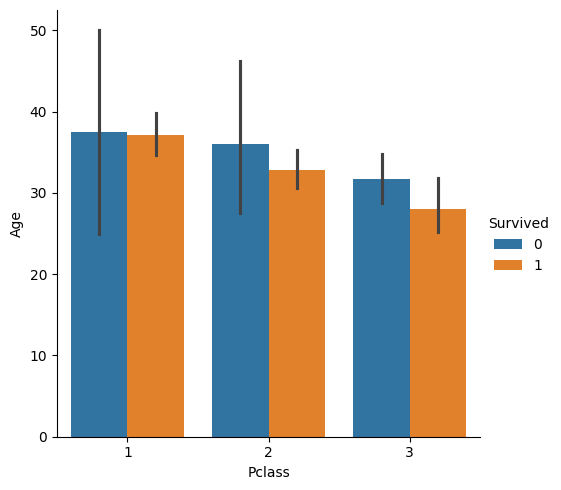

In [32]:
sns.catplot(df[df["Sex"] == "female" ], x = "Pclass", y = "Age", kind = "bar", hue= "Survived")

После того как данные очищены, стандартизированы и подготовлены, часто возникает потребность создать новые признаки
1) Чтобы улучшить анализ
    - Новые признаки могут дать более ясную картину данных.
2) Чтобы убрать шум
    - Сырые данные часто слишком “грубые”.
3) Чтобы выявить скрытые закономерности
4) Чтобы подготовить данные к будущим моделям
5) Чтобы упростить визуализацию

**Feature Engineering**  это "искусство" преобразования данных в более информативные признаки

1. Преобразование числовых признаков
    - Пример: возраст -> возрастные группы
2. Объединение признаков
    - Например, созданный признак “семья на борту”
3. Извлечение информации
    - Например, из имени -> титул
4. Бинарные признаки (флаги)
    - Например: был пропуск или нет
5. Категоризация данных
    - Например: "дорогой билет"

In [33]:
df["family_size"] = df["SibSp"] + df["Parch"]

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,448.519435,0.383392,2.167845,33.747350,0.335689,0.312721,35.129151,0.648410
std,253.420226,0.486643,0.848794,11.235758,0.577175,0.821878,55.795952,1.120235
min,1.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,233.500000,0.000000,1.000000,25.000000,0.000000,0.000000,8.050000,0.000000
50%,443.500000,0.000000,2.000000,31.000000,0.000000,0.000000,14.054150,0.000000
75%,663.750000,1.000000,3.000000,40.000000,1.000000,0.000000,32.455200,1.000000
max,891.000000,1.000000,3.000000,66.000000,3.000000,6.000000,512.329200,7.000000


In [ ]:
df["is_alone"] = (df["family_size"] == 0).astype(int)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone
0,1,0,3,male,22,1,0,7.2500,s,1,0
1,2,1,1,female,38,1,0,71.2833,c,1,0
2,3,1,3,female,26,0,0,7.9250,s,0,1
3,4,1,1,female,35,1,0,53.1000,s,1,0
4,5,0,3,male,35,0,0,8.0500,s,0,1


In [42]:
df["age_group"] = pd.cut(df["Age"], bins=[18,35,50,70],
                        labels=["young","adult","senior"])

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,age_group
0,1,0,3,male,22,1,0,7.2500,s,1,0,young
1,2,1,1,female,38,1,0,71.2833,c,1,0,adult
2,3,1,3,female,26,0,0,7.9250,s,0,1,young
3,4,1,1,female,35,1,0,53.1000,s,1,0,young
4,5,0,3,male,35,0,0,8.0500,s,0,1,young


In [44]:
df["age_group"].value_counts()

age_group
young     358
adult     152
senior     56
Name: count, dtype: int64

In [45]:
df["is_alone"].value_counts()

is_alone
1    360
0    206
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  566 non-null    int64   
 1   Survived     566 non-null    int64   
 2   Pclass       566 non-null    int64   
 3   Sex          566 non-null    object  
 4   Age          566 non-null    int64   
 5   SibSp        566 non-null    int64   
 6   Parch        566 non-null    int64   
 7   Fare         566 non-null    float64 
 8   Embarked     566 non-null    object  
 9   family_size  566 non-null    int64   
 10  is_alone     566 non-null    int64   
 11  age_group    566 non-null    category
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 53.7+ KB


<Axes: xlabel='age_group', ylabel='Survived'>

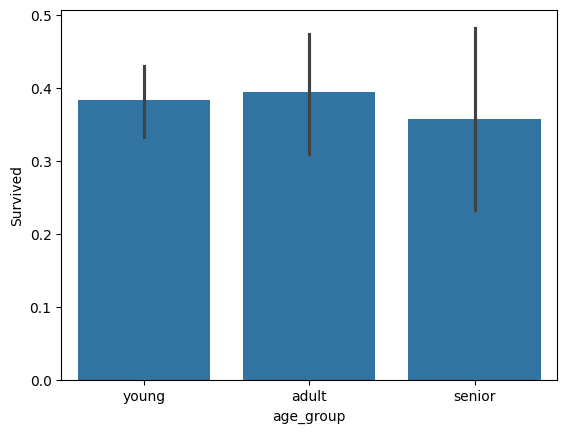

In [47]:
sns.barplot(data=df, x="age_group", y="Survived")

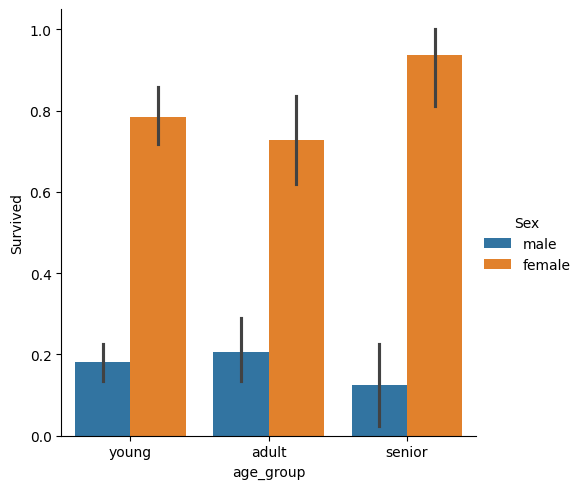

In [48]:
sns.catplot(data=df, x="age_group", y="Survived", hue="Sex", kind="bar")

<Axes: xlabel='Fare', ylabel='Count'>

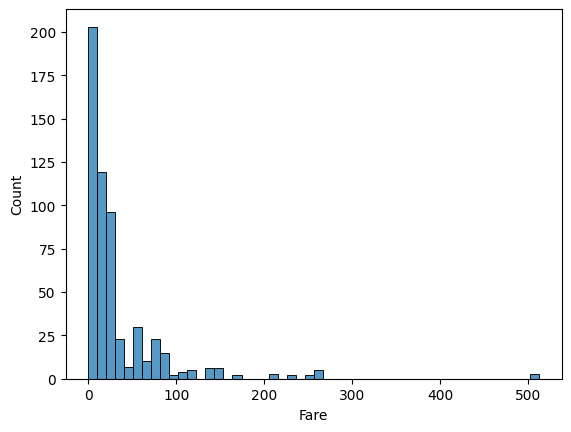

In [49]:
sns.histplot(df["Fare"], bins=50)

In [50]:
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(iqr, lower, upper)
df_no_outliers = df[(df["Fare"] >= lower) & (df["Fare"] <= upper)]

24.405199999999997 -28.557799999999997 69.06299999999999


<Axes: xlabel='Fare', ylabel='Count'>

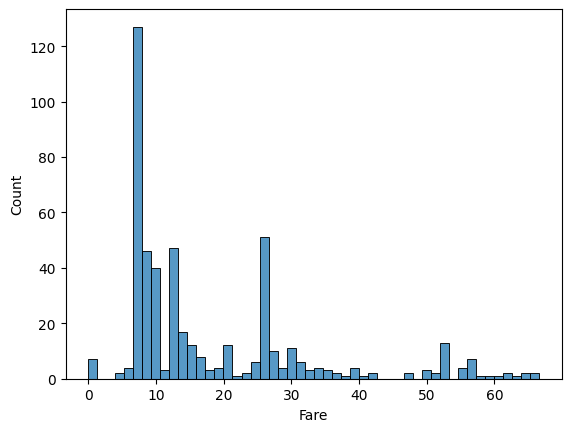

In [51]:
sns.histplot(df_no_outliers["Fare"], bins=50)

In [52]:
df["fare_categories"] = pd.qcut(df["Fare"], q=4, labels=["low", "medium", "high", "premium"])

In [55]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,age_group,fare_categories
0,1,0,3,male,22,1,0,7.2500,s,1,0,young,low
1,2,1,1,female,38,1,0,71.2833,c,1,0,adult,premium
2,3,1,3,female,26,0,0,7.9250,s,0,1,young,low
3,4,1,1,female,35,1,0,53.1000,s,1,0,young,premium
4,5,0,3,male,35,0,0,8.0500,s,0,1,young,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39,0,5,29.1250,q,5,0,adult,high
886,887,0,2,male,27,0,0,13.0000,s,0,1,young,medium
887,888,1,1,female,19,0,0,30.0000,s,0,1,young,high
889,890,1,1,male,26,0,0,30.0000,c,0,1,young,high


<Axes: >

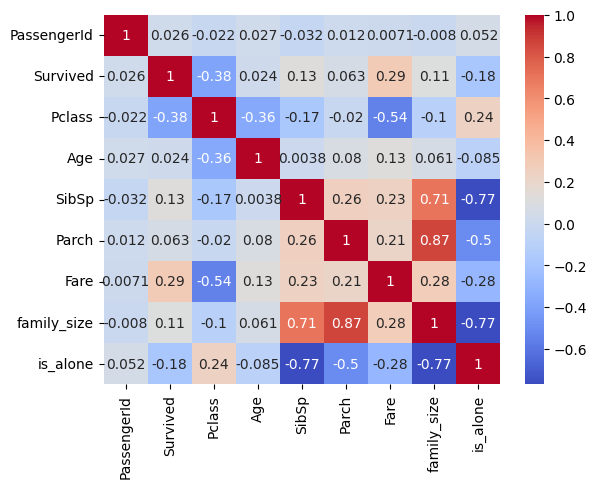

In [56]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [57]:
df["Sex"].value_counts()

Sex
male      375
female    191
Name: count, dtype: int64

In [ ]:
# price_per_unit = total_price / quantity
# df["fare_per_person"] = df["Fare"] / (df["family_size"] + 1)
# df["city_frequency"] = df["city"].map(df["city"].value_counts())
def age_to_group(age):
    if age < 18:
        return "child"
    elif age <50:
        return "adult"
    else:
        return "senior"
df["age_group"] = df["Age"].map(age_to_group)
# df["name_lenght"] = df["Name"].str.len()
# df["cabin_prefix"] = df["Cabin"].str.extract(r"([A-Z])")


# Задача

1) Выбрать датасет на Kaggle, который соблюдает критерии:
- содержит **категориальные данные**
- содержит **минимум 3 числовых признака**
- имеет **300+ строк**
- не является слишком большим (до 10–15 МБ)
2) Изучить структуру данных
Используя `head()`, `info()`, `describe()`, определите:
- какие типы данных представлены  
- есть ли пропуски  
- какие признаки выглядят важными  
- какой анализ может понадобиться  
3) Провести базовую очистку данных
- переименование колонок (например, к нижнему регистру)
- удаление или заполнение пропусков
- удаление дубликатов
- стандартизация строк (`lower()`, `strip()`)
- удаление нерелевантных столбцов
- логическая фильтрация данных (при необходимости)
4) Анализ числовых признаков
- постройте **гистограмму + KDE**
- постройте **boxplot**
- определите:
  - форму распределения (симметричное / скошенное)
  - наличие выбросов
  - длинные “хвосты”
  - можно ли считать данные примерно нормальными
5) Анализ категориальных признаков
- `barplot`
- `countplot`
- `catplot` (при необходимости, с `hue`)
Определите:
- какие категории доминируют
- есть ли редкие категории
- есть ли связь категорий с другими признаками
6) Проверить взаимосвязи между признаками
- scatterplot для нескольких пар признаков
- матрицу корреляций
- heatmap с визуализацией корреляций
- какие признаки связаны
- есть ли сильные или слабые корреляции
7) Создать минимум 2 новых признака (Feature Engineering)
**Примеры**:
- категоризация чисел (`pd.cut`, `pd.qcut`)
- объединение признаков (например, суммы)
- бинарные флаги
- извлечение информации из текста
- создание групп (например, `age_group`, `price_segment`)
8) Написать итоговый мини-отчёт (5–8 предложений)
- какие интересные **insight'ы** вы нашли
- есть ли корреляции и между какими признаками
- какие выбросы присутствовали
- какие категории наиболее важные
- какие признаки вы создали и зачем
- как изменилось понимание данных после очистки